Probabilidad de que 1/2 ≤ x + y ≤ 3/2: 0.7500


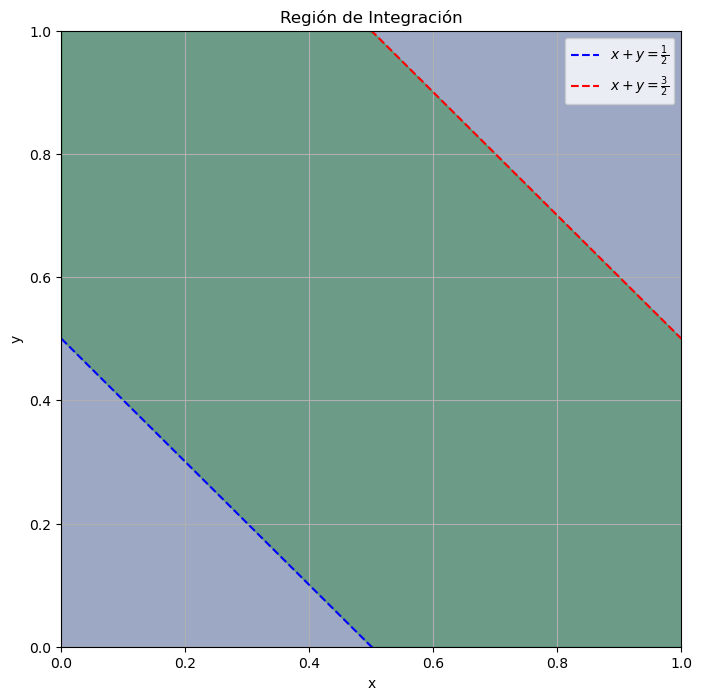

In [4]:
############## Ejemplo de funcion de densidad conjunta ##############

"""
Sea f_{12}(x, y) = 1 si 0 <= x <= 1 y 0 <= y <= 1, y f_{12}(x, y) = 0 en cualquier otro lugar.

(Esta es la función de densidad uniforme en el cuadrado unitario).

El objetivo es calcular la probabilidad de que la suma de las variables  x  y  y ,
ambas distribuidas uniformemente en el cuadrado unitario, satisfaga la condición:
1/2 <= x + y <= 3/2.

Para resolver esto, utilizamos integración doble sobre la función de densidad conjunta
para calcular el área bajo la curva en la región que cumple con esta condición.
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad

# Definición de la función de densidad conjunta
def funcion(y, x):
    return np.where((0 <= x) & (x <= 1) & (0 <= y) & (y <= 1), 1, 0)

# Calcular los límites de integración
x_min = 0
x_max = 1
y_min_1 = lambda x: (1/2) - x  # y >= 1/2 - x
y_max_1 = lambda x: (3/2) - x  # y <= 3/2 - x

# Cálculo de la probabilidad
probabilidad, error = dblquad(funcion, x_min, x_max, 
                              lambda x: max(0, y_min_1(x)), 
                              lambda x: min(1, y_max_1(x)))

print(f"Probabilidad de que 1/2 ≤ x + y ≤ 3/2: {probabilidad:.4f}")

# Graficar la región
x_vals = np.linspace(0, 1, 100)
y_vals = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = funcion(Y, X)  # Cambia densidad_conjunta a funcion

plt.figure(figsize=(8, 8))
plt.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.5)
plt.plot(x_vals, (1/2) - x_vals, label=r'$x + y = \frac{1}{2}$', color='blue', linestyle='dashed')
plt.plot(x_vals, (3/2) - x_vals, label=r'$x + y = \frac{3}{2}$', color='red', linestyle='dashed')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('Región de Integración')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.axhline(1, color='black', lw=0.5)
plt.axvline(1, color='black', lw=0.5)
plt.fill_between(x_vals, np.maximum(0, (1/2) - x_vals), np.minimum(1, (3/2) - x_vals), where=(x_vals <= 1), color='green', alpha=0.3)
plt.legend()
plt.grid()
plt.show()
